## CIS 9
## Matplotlib, Data Visualization

A picture (or a plot) is worth a thousand words.

Reading
<br>The Data Science Handbook, Chapter 4:
- Simple Line Plots
- Simple Scatter Plots
- Histograms, Binnings, Density: up to Two-Dimensional Histogram
- Customizing Legends
- Multiple subplots
- Customizing ticks
<br>
<br>Think Stats, at the following links:
- Distribution: Histogram, Summarizing distribution
- Relationship between variables: Scatter plots, Characterizing relationships, Correlation, Correlation and causation

Just like how Pandas relies on Numpy for math computation, Pandas relies on Matplotlib for plotting data.
<br>Pandas DataFrame plotting is for basic plots, and to customize the plots we need to go directly to Matplotlib.

Import libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

__Line plot__: shows the trends in a dataset.
<br>A line plot shows how data change over time, or over different locations, or when a condition changes.
<br>A line plot is for __univariate__ and __quantitative__ data

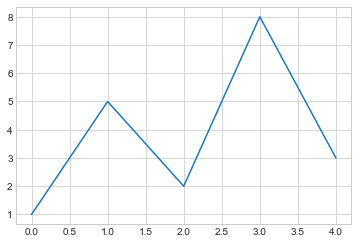

In [23]:
# A basic line plot, with no customization
nums = pd.Series([1,5,2,8,3])
plt.plot(nums)
#plt.show()

Default values are:
- A line connects the data points 1,5,2,8,3 of nums
- The line color is blue
- The y-axis ticks (values 1-8) is determined by matplotlib based on the data range of nums
- The x-axis ticks (values 0.0-4.0) is determined by matplotlib based on the index of nums

For a line plot we typically plot 2 corresponding data sequences, such as costs over time.
- The independent data sequence (time) are along the x-axis or horizontal axis
- The dependent data sequence (cost depends on time) are along the y-axis or vertical axis

In [24]:
# Data for a more realistic line plot
gb = pd.read_excel("scores.xlsx", index_col='Student')
gb

,quiz1,midterm,quiz2,final
Student,,,,
Sleepy,43,34.0,34,35
Happy,33,20.0,23,49
Doc,48,32.0,36,37
Grumpy,40,23.5,40,45
Bashful,46,42.5,46,31
Sneezy,48,38.5,48,43
Dopey,38,45.0,39,32
Snow White,41,48.0,39,41


quiz1      33.0
midterm    20.0
quiz2      23.0
final      49.0
Name: Happy, dtype: float64


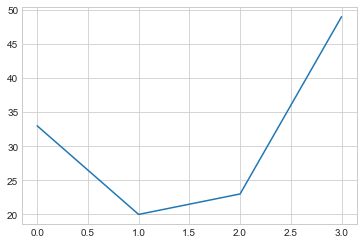

In [25]:
# plotting how 'Happy' did in the exams
print(gb.loc['Happy'])
plt.plot(np.arange(4),gb.loc['Happy'])

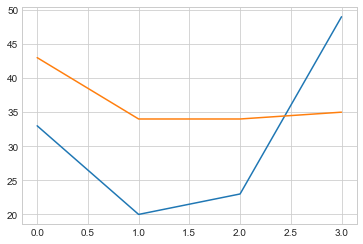

In [26]:
# plotting both 'Happy' and 'Sleepy' exams
plt.plot(np.arange(4),gb.loc['Happy'])
plt.plot(np.arange(4),gb.loc['Sleepy'])

Observing the plot, what can we say about Happy's and Sleepy's performance in class?
<br>We see that Happy had a bit of a hard time in the middle of the term (midterm and quiz2) but pulled himself together at the end and improved a lot by the final. 
<br>We also see that Sleepy started off the term pretty well, but dropped a bit (maybe got too sleepy?) and continue at the same lower level until the end of the term.
<br>The plot gives us a better sense of how these 2 students did in the class than if we just looked at a sequence of scores.

__Customize plots__ to make them easier to understand
<br>These features work for all types of plot, not just line plots

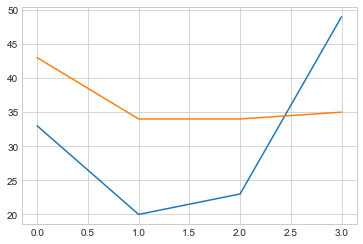

In [27]:
# add grid to the plot
plt.style.use('seaborn-whitegrid')   # only need to do this one time
                                     # it's typically put at the 'import' cell
plt.plot(np.arange(4),gb.loc['Happy'])
plt.plot(np.arange(4),gb.loc['Sleepy'])

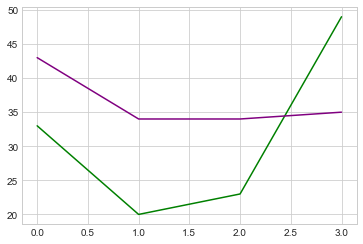

In [28]:
# customize line color
plt.plot(np.arange(4),gb.loc['Happy'], color='green')
plt.plot(np.arange(4),gb.loc['Sleepy'], color='purple')

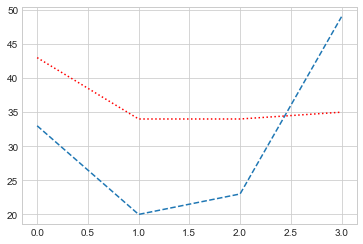

In [29]:
# customize line style (works for line plots only)
plt.plot(np.arange(4),gb.loc['Happy'], linestyle='dashed')
plt.plot(np.arange(4),gb.loc['Sleepy'], color='red', linestyle='dotted')

[Shorthand notation for line style and color](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html)
<br>Scroll down to see the list of characters for line style and color

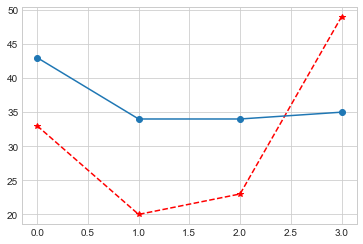

In [30]:
# combine both color and style with shorthand notation
plt.plot(np.arange(4),gb.loc['Happy'], '*--r')
# using shorthand notation, plot Sleepy's exams as a line with a circle marker 
# at each data point?
plt.plot(np.arange(4),gb.loc['Sleepy'], 'o-')

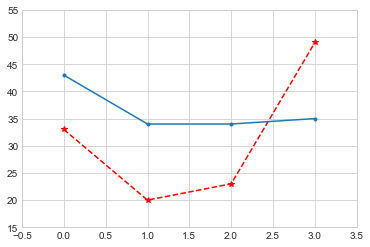

In [31]:
# adjusting limits on axes
plt.axis([-0.5,3.5,15,55])
plt.plot(np.arange(4),gb.loc['Happy'], '*--r')
plt.plot(np.arange(4),gb.loc['Sleepy'], '.-')

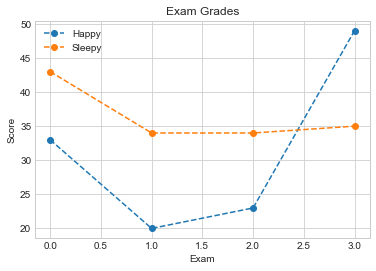

In [32]:
# label plot
plt.title("Exam Grades")
plt.xlabel("Exam")
plt.ylabel("Score")
plt.plot(np.arange(4),gb.loc['Happy'], 'o--', label='Happy')
plt.plot(np.arange(4),gb.loc['Sleepy'], 'o--', label='Sleepy')
plt.legend()

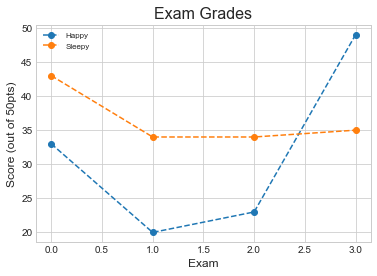

In [33]:
# change font size
plt.title("Exam Grades",fontsize=16)
plt.xlabel("Exam",fontsize=12)
plt.ylabel("Score (out of 50pts)",fontsize=12)
plt.plot(np.arange(4),gb.loc['Happy'], 'o--', label='Happy')
plt.plot(np.arange(4),gb.loc['Sleepy'], 'o--', label='Sleepy')
plt.legend(fontsize=8)

"\nplt.plot(('quiz1','midterm', 'quiz2', 'final'),gb.loc['Happy'], 'o--', label='Happy')\nplt.plot(('quiz1','midterm', 'quiz2', 'final'),gb.loc['Sleepy'], 'o--', label='Sleepy')\nplt.legend(fontsize=8)\n#plt.xticks(rotation=45)\n"

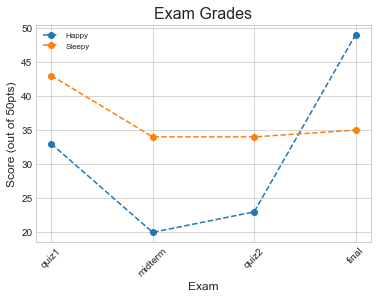

In [34]:
# change xticks and yticks
plt.title("Exam Grades",fontsize=16)
plt.xlabel("Exam",fontsize=12)
plt.ylabel("Score (out of 50pts)",fontsize=12)
plt.plot(np.arange(4),gb.loc['Happy'], 'o--', label='Happy')
plt.plot(np.arange(4),gb.loc['Sleepy'], 'o--', label='Sleepy')
plt.legend(fontsize=8)
# the x-values are 0-4, which is not user friendly
# we can change x-ticks to more descriptive strings:
plt.xticks(np.arange(4),('quiz1','midterm', 'quiz2', 'final'))
plt.xticks(np.arange(4),('quiz1','midterm', 'quiz2', 'final'),rotation=45)

# alternatively, if we're lucky enough to have the strings from the
# dataset, then we can give matplotlib the 4 text strings for the x-values
'''
plt.plot(('quiz1','midterm', 'quiz2', 'final'),gb.loc['Happy'], 'o--', label='Happy')
plt.plot(('quiz1','midterm', 'quiz2', 'final'),gb.loc['Sleepy'], 'o--', label='Sleepy')
plt.legend(fontsize=8)
#plt.xticks(rotation=45)
'''

Text(0.5, 1.0, 'Sine wave')

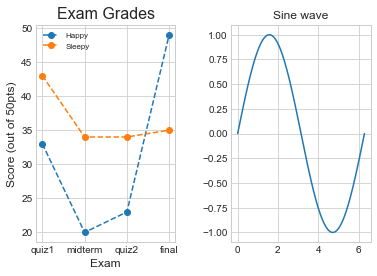

In [35]:
# subplot
plt.subplot(1,2,1)   # 1 row, 2 cols, subplot 1
plt.subplots_adjust(hspace=0.4,wspace=0.4)

plt.title("Exam Grades",fontsize=16)
plt.xlabel("Exam",fontsize=12)
plt.ylabel("Score (out of 50pts)",fontsize=12)
plt.plot(np.arange(4),gb.loc['Happy'], 'o--', label='Happy')
plt.plot(np.arange(4),gb.loc['Sleepy'], 'o--', label='Sleepy')
plt.legend(fontsize=8)
plt.xticks(np.arange(4), ('quiz1','midterm', 'quiz2', 'final') ) 

plt.subplot(1,2,2)   # 1 row, 2 cols, subplot 2
x = np.linspace(0, 2*np.pi, 400)
plt.plot(x, np.sin(x))
plt.title("Sine wave")

Text(0.5, 1.0, 'Sine wave')

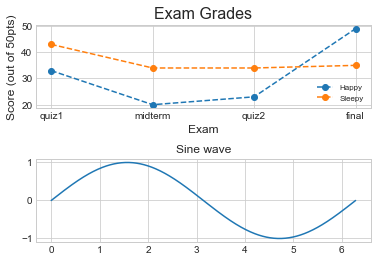

In [36]:
# given the 2 plots below (same as the 2 plots above)
# create a plot with 2 subplots where the exam grade plot is put above
# the sine wave plot?
plt.subplot(2,1,1)   # 2 rows, 1 col, subplot 1
plt.subplots_adjust(hspace=0.6, wspace=0.6)

plt.title("Exam Grades",fontsize=16)
plt.xlabel("Exam",fontsize=12)
plt.ylabel("Score (out of 50pts)",fontsize=12)
plt.plot(np.arange(4),gb.loc['Happy'], 'o--', label='Happy')
plt.plot(np.arange(4),gb.loc['Sleepy'], 'o--', label='Sleepy')
plt.legend(fontsize=8)
plt.xticks(np.arange(4), ('quiz1','midterm', 'quiz2', 'final') ) 

plt.subplot(2,1,2)   # 2 rows, 1 col, subplot 2
x = np.linspace(0, 2*np.pi, 400)
plt.plot(x, np.sin(x))
plt.title("Sine wave")
#plt.xticks(np.arange(0,7,3),('0','pi','2pi'))

__Histogram__: shows the frequency distribution of the dataset, or how data are distributed. It gives an overview of the dataset.
<br>A histogram divides the data range into bins and displays a count of the data points whose values are in a particular bin.
<br>A histogram is used with __univariate__ and __quantitative__ data

8000
---1111----


(array([  1.,   0.,   0.,   0.,   1.,   2.,   4.,   3.,  10.,  12.,  10.,
         28.,  34.,  68.,  84.,  85., 110., 129., 209., 220., 222., 338.,
        366., 379., 449., 420., 442., 515., 464., 482., 454., 410., 402.,
        335., 302., 241., 194., 137., 127., 106.,  64.,  41.,  36.,  20.,
         16.,   9.,   7.,   6.,   2.,   4.]),
 array([-4.19048487, -4.03848709, -3.88648932, -3.73449154, -3.58249376,
        -3.43049598, -3.2784982 , -3.12650042, -2.97450264, -2.82250486,
        -2.67050709, -2.51850931, -2.36651153, -2.21451375, -2.06251597,
        -1.91051819, -1.75852041, -1.60652263, -1.45452486, -1.30252708,
        -1.1505293 , -0.99853152, -0.84653374, -0.69453596, -0.54253818,
        -0.39054041, -0.23854263, -0.08654485,  0.06545293,  0.21745071,
         0.36944849,  0.52144627,  0.67344405,  0.82544182,  0.9774396 ,
         1.12943738,  1.28143516,  1.43343294,  1.58543072,  1.7374285 ,
         1.88942628,  2.04142405,  2.19342183,  2.34541961,  2.49741739,
 

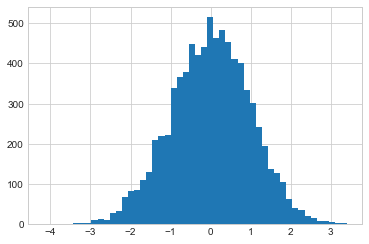

In [37]:
# A 'classic' distribution is the normal or Gaussian distribution, also known as the bell curve
nums = np.random.normal(size=8000)
print(len(nums))
print("---1111----")
plt.hist(nums, bins=50)

In [38]:
# reading in data
gb = pd.read_excel("scores.xlsx", index_col='Student')
gb

,quiz1,midterm,quiz2,final
Student,,,,
Sleepy,43,34.0,34,35
Happy,33,20.0,23,49
Doc,48,32.0,36,37
Grumpy,40,23.5,40,45
Bashful,46,42.5,46,31
Sneezy,48,38.5,48,43
Dopey,38,45.0,39,32
Snow White,41,48.0,39,41


Student
Sleepy        43.0
Happy         33.0
Doc           48.0
Grumpy        40.0
Bashful       46.0
Sneezy        48.0
Dopey         38.0
Snow White    41.0
Sleepy        34.0
Happy         20.0
Doc           32.0
Grumpy        23.5
Bashful       42.5
Sneezy        38.5
Dopey         45.0
Snow White    48.0
Sleepy        34.0
Happy         23.0
Doc           36.0
Grumpy        40.0
Bashful       46.0
Sneezy        48.0
Dopey         39.0
Snow White    39.0
Sleepy        35.0
Happy         49.0
Doc           37.0
Grumpy        45.0
Bashful       31.0
Sneezy        43.0
Dopey         32.0
Snow White    41.0
dtype: float64


(array([1., 2., 0., 1., 5., 3., 6., 5., 4., 5.]),
 array([20. , 22.9, 25.8, 28.7, 31.6, 34.5, 37.4, 40.3, 43.2, 46.1, 49. ]),
 <BarContainer object of 10 artists>)

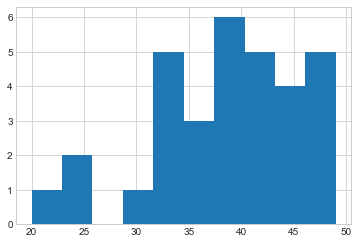

In [39]:
# show the score distribution of all exams
total = (gb['quiz1'])
total = total.append(gb['midterm'])
total = total.append(gb['quiz2'])
total = total.append(gb['final'])
print(total)
plt.hist(total)

Default values are:
- the color is blue
- the range of data is along the x-axis
- the count of data values in each bin is along the y-axis
- the number of bins is 10. In this example: (50-20)/10 = 3, so the bins are: 20-23pts, 23-26pts, 26-29pts, 29-32pts...

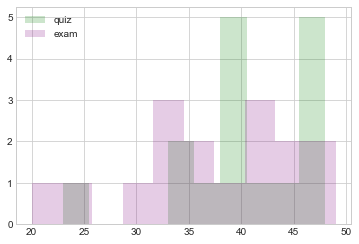

In [40]:
# display 2 distributions for comparison
quiz = gb['quiz1']
quiz = quiz.append(gb['quiz2'])
exam = gb['midterm']
exam = exam.append(gb['final'])
plt.hist(quiz, color='green', label='quiz', alpha=0.2)
plt.hist(exam, color='purple', label='exam', alpha=0.2)
plt.legend()

__Bar chart__: gives a comparison of the categories within a dataset.
<br>Categories, or categorical data, show the groupings of data.
<br>Example: data are drinks people have at a meal, categories are sodas, water, tea, coffee
<br>Or: data are employees at a company, categories are full time, part time, seasonal employees
<br>A bar chart is used with __univariate__ and __categorical__ data

In [41]:
gradebook = pd.read_excel("scores.xlsx", index_col='Student')
stInfo = pd.read_excel("ids.xlsx", index_col='Student')
data = pd.concat([stInfo, gradebook], axis=1)
print(data)
finals = data.groupby("year").mean().final
print(finals)
print(finals.values)
print(finals.index.values)

              id  year  quiz1  midterm  quiz2  final
Student                                             
Sleepy      1124     1     43     34.0     34     35
Happy       9559     2     33     20.0     23     49
Doc         7503     2     48     32.0     36     37
Grumpy      5738     3     40     23.5     40     45
Bashful     9208     2     46     42.5     46     31
Sneezy      2823     1     48     38.5     48     43
Dopey       4823     1     38     45.0     39     32
Snow White  9794     2     41     48.0     39     41
year
1    36.666667
2    39.500000
3    45.000000
Name: final, dtype: float64
[36.66666667 39.5        45.        ]
[1 2 3]


Text(0, 0.5, 'Mean Final Exam Score')

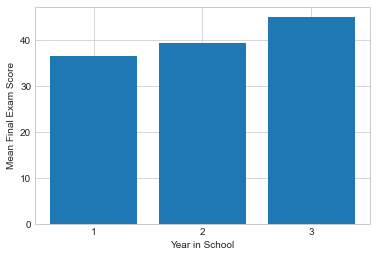

In [42]:
# In a bar chart, the categories are along the x-axis, 
# and the count of data belong in each category is along the y-axis
plt.bar(np.arange(len(finals)), finals, align="center")
plt.xticks(np.arange(len(finals)),finals.index.values) 
plt.xlabel("Year in School")
plt.ylabel("Mean Final Exam Score")

What conclusion can we draw from the bar chart?

In [ ]:
# We can conclude that the 3rd year students tend to score better on the
# exams than the 1st year students.

__Scatter Plot__: shows the relationship between 2 datasets.
<br>Data values of each set are plotted and their locations on the plot can show any correlation between the two sets.
<br>A scatter plot is used with __bivariate__ and __quantitative__ data

Text(0.5, 1.0, 'Normal distribution data')

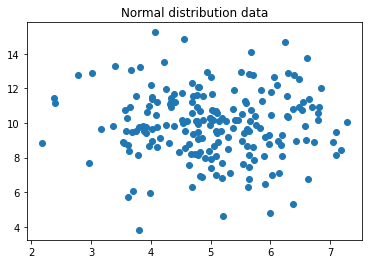

In [5]:
# scatter plot of unrelated data
x = np.random.normal(5.0, 1.0, 200)   # center around 5, spread of 1
y = np.random.normal(10.0, 2.0, 200)  # center around 10, spread of 2
plt.scatter(x, y)
plt.title("Normal distribution data")

Text(0, 0.5, 'Sale in Dollars')

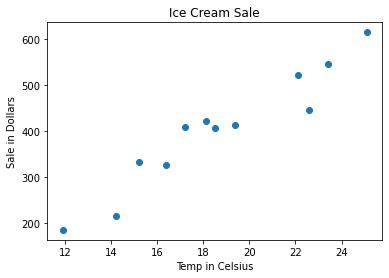

In [6]:
# scatter plot of correlated data
temp = (14.2,16.4,11.9,15.2,18.5,22.1,19.4,25.1,23.4,18.1,22.6,17.2)
sale = (215,325,185,332,406,522,412,614,544,421,445,408)
plt.scatter(temp,sale)    
plt.title("Ice Cream Sale")
plt.xlabel("Temp in Celsius")
plt.ylabel("Sale in Dollars")

0.9575066230015951
713.0738396922482


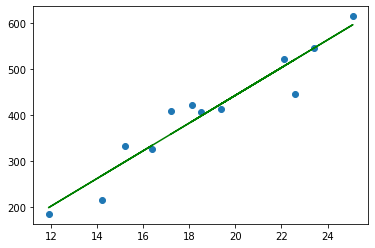

In [8]:
# Looking ahead:
from scipy import stats

(slope, intercept, r, *rest) = stats.linregress(temp, sale)
print(r)

def f(val):
    return slope * val + intercept

print(f(29))   # 29C = 85F

line = [f(val) for val in temp]
plt.scatter(temp,sale)
plt.plot(temp, line, '-g')